In [1]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Gaussian Simulation

In [2]:
num_iter = 100
num_samples = 100

x_array = np.random.normal(0.6, 0.2, num_samples)
y_array = np.random.normal(0.6, 0.2, num_samples)

result_list = []
for _ in range(num_iter):
    x_new = np.random.normal(0.6, 0.2, num_samples)
    y_new = np.random.normal(0.6, 0.2, num_samples)

    x_array = np.append(x_array, x_new)
    y_array = np.append(y_array, y_new)
    
    keep_idx = (x_array <= 1) & (y_array <= 1) & (x_array >= 0) & (y_array >= 0)

    x_sq = x_array[keep_idx]
    y_sq = y_array[keep_idx]

    inside_idx = (x_sq - 0) ** 2 + (y_sq - 0) ** 2 <= 1**2
    outside_idx = (x_sq - 0) ** 2 + (y_sq - 0) ** 2 > 1**2

    pi_number_predict = 4 * np.mean(inside_idx)
    diff_pi = np.pi - pi_number_predict
    
    result_list.append({
        "NumberPoints": len(x_array),
        "PI_estimate": pi_number_predict,
        "Diff_real_PI": diff_pi,
        "Diff_abs_real_PI": np.abs(diff_pi)
    })

df_res = pd.DataFrame(result_list)

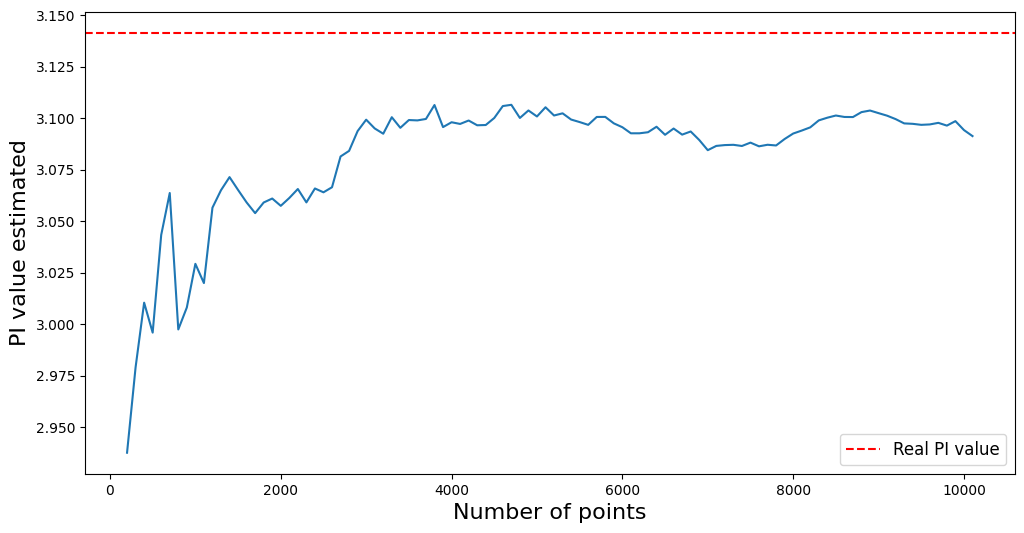

In [3]:
plt.figure(figsize=(12, 6))

plt.plot(df_res["NumberPoints"], df_res["PI_estimate"])
plt.axhline(np.pi, c="red", linestyle="--", label="Real PI value")

plt.ylabel("PI value estimated", fontsize=16)
plt.xlabel("Number of points", fontsize=16)
plt.legend(fontsize=12)

plt.show()

## Estimation of PI value in terms of mean and std

In [4]:
def loop_pi_estimation(mean_dist=0.6, std_dist=0.2, num_iter=100, num_samples=100):

    x_array = np.random.normal(mean_dist, std_dist, num_samples)
    y_array = np.random.normal(mean_dist, std_dist, num_samples)
    
    result_list = []
    for _ in range(num_iter):
        x_new = np.random.normal(mean_dist, std_dist, num_samples)
        y_new = np.random.normal(mean_dist, std_dist, num_samples)
        
        x_array = np.append(x_array, x_new)
        y_array = np.append(y_array, y_new)

        keep_idx = (x_array <= 1) & (y_array <= 1) & (x_array >= 0) & (y_array >= 0)

        x_sq = x_array[keep_idx]
        y_sq = y_array[keep_idx]

        inside_idx = (x_sq - 0) ** 2 + (y_sq - 0) ** 2 <= 1**2
        outside_idx = (x_sq - 0) ** 2 + (y_sq - 0) ** 2 > 1**2

        pi_number_predict = 4 * np.mean(inside_idx)
        diff_pi = np.pi - pi_number_predict

        result_list.append({
            "NumberPoints": len(x_array),
            "PI_estimate": pi_number_predict,
            "Diff_real_PI": diff_pi,
            "Diff_abs_real_PI": np.abs(diff_pi)
        })

    return pd.DataFrame(result_list)

In [5]:
mean_arange = np.arange(0, 1+0.1, 0.1)
std_arange = np.arange(0, 1+0.1, 0.1)

all_params_list = [dict(zip(["mean", "std"], comb)) for comb in list(itertools.product(*[mean_arange, std_arange]))]

save_result_list = []
for params_dict in all_params_list:
    df_res = loop_pi_estimation(mean_dist=params_dict["mean"], std_dist=params_dict["std"], 
                                num_iter=100, num_samples=100)
    
    df_res["MeanDist"] = params_dict["mean"]
    df_res["StdDist"] = params_dict["std"]
    
    save_result_list.append(df_res)

In [6]:
close_estimations = np.argsort([np.abs(s["PI_estimate"].iloc[-1] - np.pi) for s in save_result_list])[:5]

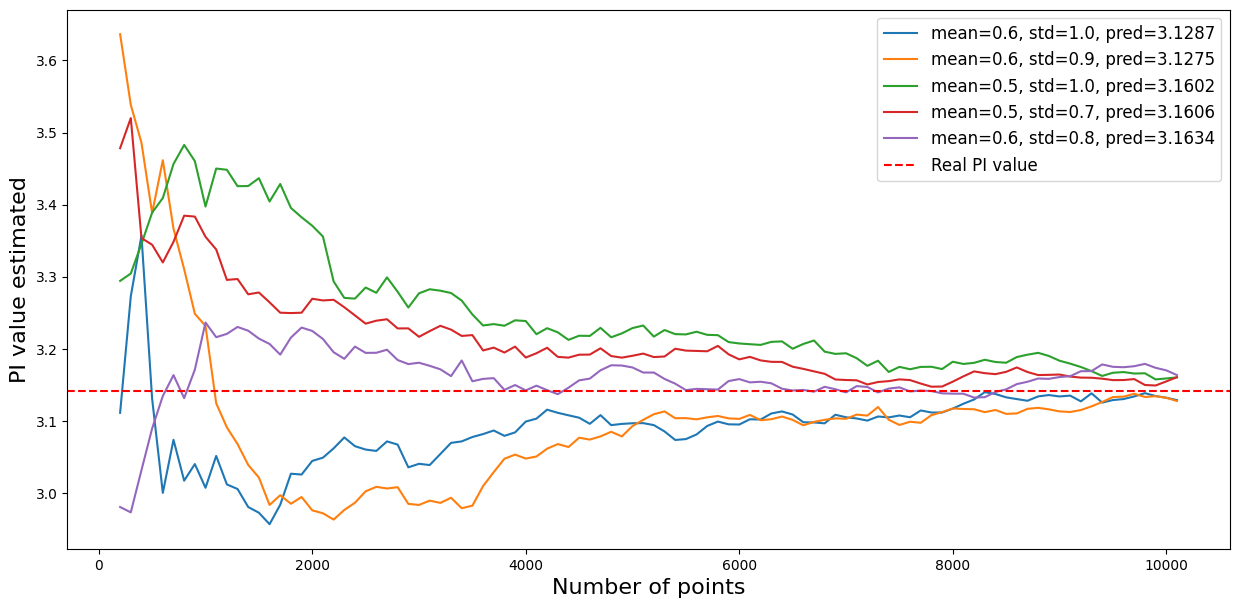

In [7]:
plt.figure(figsize=(15, 7))

for close_idx in close_estimations:
    
    mean_dist = np.round(save_result_list[close_idx]["MeanDist"].iloc[0], 1)
    std_dist = np.round(save_result_list[close_idx]["StdDist"].iloc[0], 1)
    pi_estimate = np.round(save_result_list[close_idx]["PI_estimate"].iloc[-1], 4)
    label_str = "mean=" + str(mean_dist) + ", std=" + str(std_dist) + ", pred=" + str(pi_estimate)
    
    plt.plot(save_result_list[close_idx]["NumberPoints"], save_result_list[close_idx]["PI_estimate"], label=label_str)

plt.axhline(np.pi, c="red", linestyle="--", label="Real PI value")

plt.ylabel("PI value estimated", fontsize=16)
plt.xlabel("Number of points", fontsize=16)
plt.legend(fontsize=12)

plt.show()

In [8]:
df_pi_last = pd.DataFrame(
    [s.iloc[-1] for s in save_result_list]
).sort_values("Diff_abs_real_PI").reset_index(drop=True)
df_pi_last.head(20)

,NumberPoints,PI_estimate,Diff_real_PI,Diff_abs_real_PI,MeanDist,StdDist
0,10100.0,3.128740,0.012852,0.012852,0.6,1.0
1,10100.0,3.127479,0.014114,0.014114,0.6,0.9
2,10100.0,3.160221,-0.018628,0.018628,0.5,1.0
3,10100.0,3.160600,-0.019007,0.019007,0.5,0.7
4,10100.0,3.163435,-0.021842,0.021842,0.6,0.8
5,10100.0,3.114119,0.027474,0.027474,0.6,0.2
6,10100.0,3.098431,0.043162,0.043162,0.7,1.0
7,10100.0,3.193247,-0.051655,0.051655,0.5,0.8
8,10100.0,3.204846,-0.063253,0.063253,0.5,0.9
9,10100.0,3.077523,0.064070,0.064070,0.6,0.5


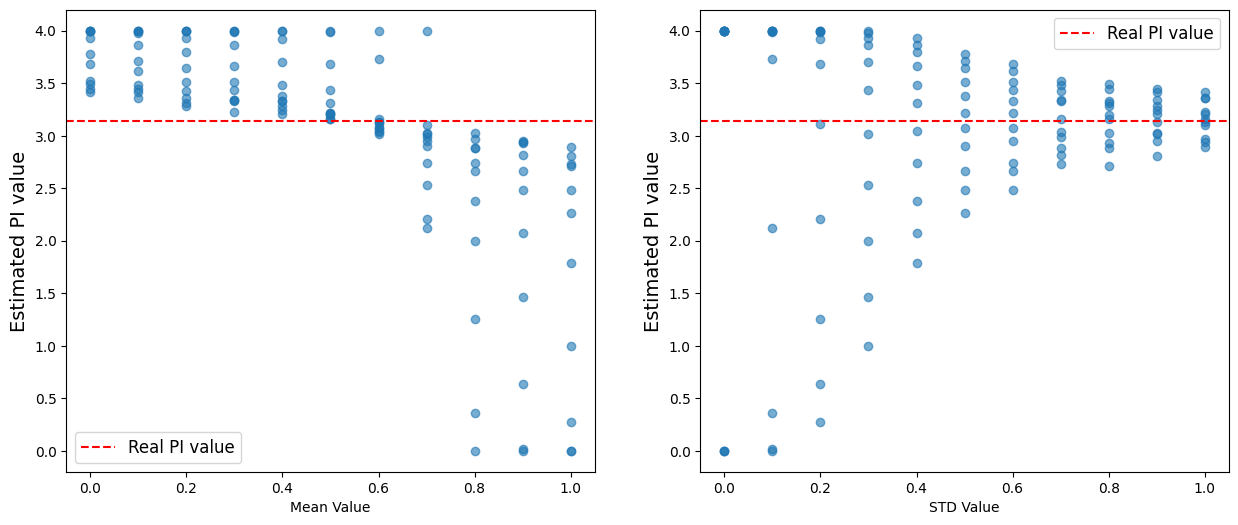

In [9]:
fig = plt.figure(figsize=(15, 6))

fig.add_subplot(1,2,1)
plt.scatter(df_pi_last["MeanDist"], df_pi_last["PI_estimate"], alpha=0.6)
plt.axhline(np.pi, c="red", linestyle="--", label="Real PI value")
plt.legend(fontsize=12)
plt.ylabel("Estimated PI value", fontsize=14)
plt.xlabel("Mean Value")

fig.add_subplot(1,2,2)
plt.scatter(df_pi_last["StdDist"], df_pi_last["PI_estimate"], alpha=0.6)
plt.axhline(np.pi, c="red", linestyle="--", label="Real PI value")
plt.legend(fontsize=12)
plt.ylabel("Estimated PI value", fontsize=14)
plt.xlabel("STD Value")

plt.show()

In [10]:
# Define ranges for MeanDist and StdDist
mean_dist_range = df_pi_last['MeanDist'].values
std_dist_range = df_pi_last['StdDist'].values

# Create meshgrid
mean_dist_mesh, std_dist_mesh = np.meshgrid(mean_dist_range, std_dist_range)

pi_pred_mesh = np.zeros((mean_dist_mesh.shape[0], mean_dist_mesh.shape[1]))
for i in range(mean_dist_mesh.shape[0]):
    for j in range(mean_dist_mesh.shape[1]):
        cond1 = df_pi_last["MeanDist"] == mean_dist_mesh[i, j]
        cond2 = df_pi_last["StdDist"] == std_dist_mesh[i, j]
        z_value = df_pi_last[cond1 & cond2]["PI_estimate"].iloc[0]
        
        pi_pred_mesh[i, j] = z_value

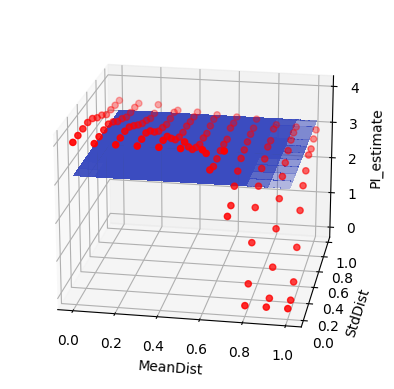

In [11]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(df_pi_last['MeanDist'], df_pi_last['StdDist'], df_pi_last['PI_estimate'], c='r', marker='o')

# Plot meshgrid
# surf = ax.plot_surface(mean_dist_mesh, std_dist_mesh, pi_pred_mesh, antialiased=False, cmap=cm.coolwarm, linewidth=0)
surf = ax.plot_surface(mean_dist_mesh, std_dist_mesh, np.zeros_like(mean_dist_mesh) + np.pi, 
                       antialiased=False, cmap=cm.coolwarm, linewidth=0, alpha=0.1)

ax.view_init(20, -80)

# Set labels
ax.set_xlabel('MeanDist')
ax.set_ylabel('StdDist')
ax.set_zlabel('PI_estimate')
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Mean +/- std 3.0469 +/- 0.9736
Median 3.2428256070640176


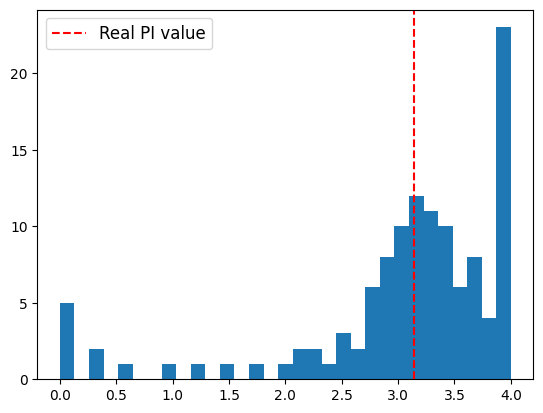

In [12]:
print("Mean +/- std", np.round(np.mean(df_pi_last["PI_estimate"]), 4), 
      "+/-", np.round(np.std(df_pi_last["PI_estimate"]), 4))
print("Median", np.nanmedian(df_pi_last["PI_estimate"]))

plt.hist(df_pi_last["PI_estimate"], bins=31)
plt.axvline(np.pi, c="red", linestyle="--", label="Real PI value")
plt.legend(fontsize=12)

plt.show()